## Implementação do algoritmo SVM (Support Vector Machine) para classificação de dados
TODO: Comparar holdout e cross-validation

In [18]:
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [19]:
input_file = 'train.csv'

# Load the data
df = pd.read_csv(input_file)

features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = 'price_range'
x = df.loc[:, features].values
y = df.loc[:, target].values

# x_minmax = MinMaxScaler().fit_transform(x)
# normalized_minmax = pd.DataFrame(x_minmax, columns = features)
# normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)

In [20]:
# Create stratified k-fold cross-validation
sk_folds = StratifiedKFold(n_splits = 10)

# Create the model K Nearest Neighbors
# knn = KNeighborsClassifier(n_neighbors=21)
# svm = SVC(kernel='linear', C=1)
svm = SVC(kernel='poly', C=1)

scores = cross_val_score(svm, x, y, cv=sk_folds)
# use cross_val_predict
y_pred_cv = cross_val_predict(svm, x, y, cv=sk_folds)


print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

print("Accuracy: ", accuracy_score(y, y_pred_cv))
print("F1 Score: ", f1_score(y, y_pred_cv, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y, y_pred_cv))


Cross Validation Scores:  [0.96  0.96  0.95  0.975 0.93  0.96  0.965 0.95  0.945 0.955]
Average CV Score:  0.9550000000000001
Number of CV Scores used in Average:  10
Accuracy: 0.96 (+/- 0.02)
Accuracy:  0.955
F1 Score:  0.9548038826559917
Confusion Matrix: 
 [[500   0   0   0]
 [ 28 464   8   0]
 [  0  20 465  15]
 [  0   0  19 481]]


In [21]:
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm, columns = ['Pred 0', 'Pred 1', 'Pred 2', 'Pred 3'], 
                               index = ['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3'])
    
    plt.figure(figsize=(8,5))
    print(classification_report(y_test, y_pred))
    # sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=True, cmap='plasma')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

Average Accuracy: 95.50%
Average F1 Score: 95.48%
Average Precision: 95.58%
Average Recall: 95.50%
Average Specificity: 98.50%
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       500
           1       0.96      0.94      0.95       500
           2       0.95      0.94      0.94       500
           3       0.97      0.96      0.97       500

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



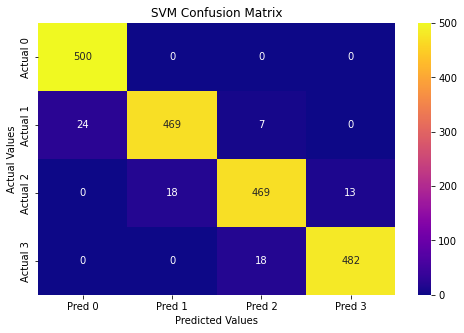

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       500
           1       0.96      0.93      0.94       500
           2       0.95      0.93      0.94       500
           3       0.97      0.96      0.97       500

    accuracy                           0.95      2000
   macro avg       0.96      0.96      0.95      2000
weighted avg       0.96      0.95      0.95      2000



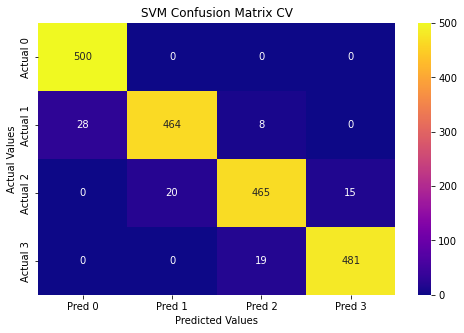

In [22]:

acc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

conf_matrices = []

# Normalize the data
x_minmax = MinMaxScaler().fit_transform(x)
# print(x_minmax)
# normalized_minmax = pd.DataFrame(x_minmax, columns = features)
# normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)

for train_index, test_index in sk_folds.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # knn.fit(x_train, y_train)
    svm.fit(x_train, y_train)
    # predictions = knn.predict(x_test)
    predictions = svm.predict(x_test)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    conf_matrices.append(cm)
    
    # Compute accuracy, F1 score, precision, recall (sensitivity), and specificity
    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    specificity = [np.sum(np.delete(np.delete(cm, i, 0), i, 1)) / (np.sum(np.delete(cm, i, 0))) for i in range(len(cm))]
    
    acc_scores.append(acc)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    specificity_scores.append(specificity)

# Average the scores
average_accuracy = np.mean(acc_scores)
average_f1_score = np.mean(f1_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_specificity = np.mean(specificity_scores)

# Fit the model without cross-validation
# y_pred = knn.predict(x)
y_pred = svm.predict(x)

print(f"Average Accuracy: {average_accuracy*100:.2f}%")
print(f"Average F1 Score: {average_f1_score*100:.2f}%")
print(f"Average Precision: {average_precision*100:.2f}%")
print(f"Average Recall: {average_recall*100:.2f}%")
print(f"Average Specificity: {average_specificity*100:.2f}%")

cm_rfc=my_confusion_matrix(y, y_pred, 'SVM Confusion Matrix')
cm_rfc_cv = my_confusion_matrix(y, y_pred_cv, 'SVM Confusion Matrix CV')

Normalized confusion matrix
[[1.    0.    0.    0.   ]
 [0.056 0.928 0.016 0.   ]
 [0.    0.04  0.93  0.03 ]
 [0.    0.    0.038 0.962]]


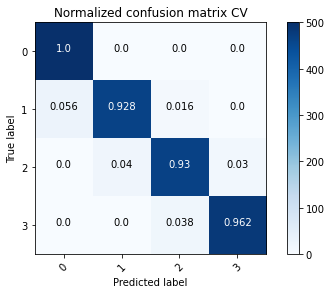

Normalized confusion matrix
[[1.    0.    0.    0.   ]
 [0.048 0.938 0.014 0.   ]
 [0.    0.036 0.938 0.026]
 [0.    0.    0.036 0.964]]


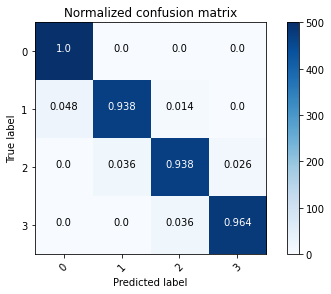

In [23]:

"""
This function prints and plots the confusion matrix.
Normalization can be applied by setting `normalize=True`.
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    
    
# plot_confusion_matrix(np.sum(conf_matrices, axis=0), classes=[0, 1, 2, 3], normalize=True, title='Normalized confusion matrix')
# plt.show()
# plot with cv
plot_confusion_matrix(cm_rfc_cv, classes=[0, 1, 2, 3], normalize=True, title='Normalized confusion matrix CV')
plt.show()
#plot without cv
plot_confusion_matrix(cm_rfc, classes=[0, 1, 2, 3], normalize=True, title='Normalized confusion matrix')

In [24]:
# svm utilizing holdout instead of cross-validation


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', C=1)

svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
y_pred_train = svm.predict(x_train)

print('---- Holdout ----')
print('Test Set')
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

print('Train Set')
print("Accuracy: ", accuracy_score(y_train, y_pred_train))
print("F1 Score: ", f1_score(y_train, y_pred_train, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred_train))


---- Holdout ----
Test Set
Accuracy:  0.9733333333333334
F1 Score:  0.9733206542476304
Confusion Matrix: 
 [[146   5   0   0]
 [  1 145   0   0]
 [  0   4 139   5]
 [  0   0   1 154]]
Train Set
Accuracy:  0.9935714285714285
F1 Score:  0.9935744327932203
Confusion Matrix: 
 [[349   0   0   0]
 [  0 351   3   0]
 [  0   3 348   1]
 [  0   0   2 343]]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.94      0.99      0.97       146
           2       0.99      0.94      0.97       148
           3       0.97      0.99      0.98       155

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



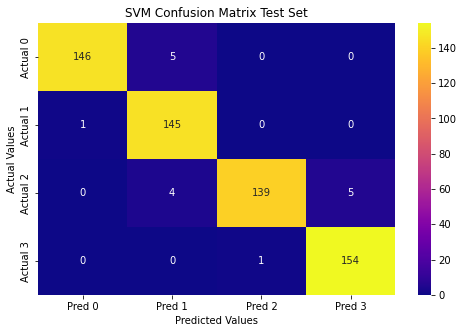

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       0.99      0.99      0.99       354
           2       0.99      0.99      0.99       352
           3       1.00      0.99      1.00       345

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



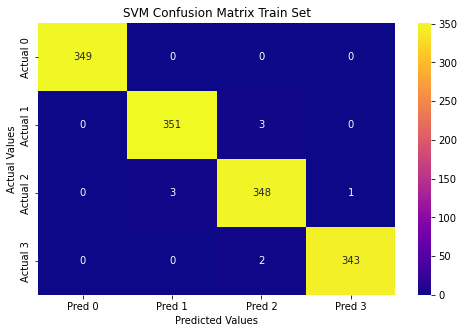

In [25]:
# print confusion matrix
cm_rfc=my_confusion_matrix(y_test, y_pred, 'SVM Confusion Matrix Test Set')
cm_rfc=my_confusion_matrix(y_train, y_pred_train, 'SVM Confusion Matrix Train Set')
# plot_confusion_matrix(cm_rfc, classes=[0, 1, 2, 3], normalize=True, title='Normalized confusion matrix')